For this project I am looking at statistics of police related fatalities from 2015-present. I am curious to see how these statistics have changed over time and whether there are statistical differences between groups. To start out, I will be loading in some key libraries and my data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import gmaps
import os

In [2]:
data = pd.read_csv('fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 17 columns):
id                         6005 non-null int64
name                       5787 non-null object
date                       6005 non-null datetime64[ns]
manner_of_death            6005 non-null object
armed                      5795 non-null object
age                        5740 non-null float64
gender                     6004 non-null object
race                       5400 non-null object
city                       6005 non-null object
state                      6005 non-null object
signs_of_mental_illness    6005 non-null bool
threat_level               6005 non-null object
flee                       5666 non-null object
body_camera                6005 non-null bool
longitude                  5711 non-null float64
latitude                   5711 non-null float64
is_geocoding_exact         6005 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(1), object(9)
memor

From here, I will be looking at various columns to look at what values our data contains and get a general idea of distributions.

In [3]:
data.date = pd.to_datetime(data.date)
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
data.body_camera.value_counts()

False    5250
True      755
Name: body_camera, dtype: int64

In [6]:
data.gender.value_counts()

M    5740
F     264
Name: gender, dtype: int64

In [7]:
data.city.value_counts()[:10]

Los Angeles    91
Phoenix        88
Houston        64
Las Vegas      52
San Antonio    50
Chicago        41
Columbus       40
Albuquerque    40
Kansas City    36
Denver         36
Name: city, dtype: int64

In [34]:
data.armed.value_counts()

gun                        3425
knife                       883
unarmed                     384
toy weapon                  201
vehicle                     190
undetermined                168
unknown weapon               87
machete                      49
Taser                        27
ax                           24
sword                        23
baseball bat                 19
gun and knife                19
hammer                       18
metal pipe                   15
screwdriver                  15
gun and vehicle              14
box cutter                   13
sharp object                 11
hatchet                      11
gun and car                  11
BB gun                       10
crossbow                      9
shovel                        7
scissors                      7
pipe                          6
baton                         6
rock                          6
metal object                  5
straight edge razor           5
                           ... 
machete 

In [8]:
data.race.value_counts()

W    2742
B    1428
H    1005
A      96
N      82
O      47
Name: race, dtype: int64

In [9]:
data.manner_of_death.value_counts()

shot                5703
shot and Tasered     302
Name: manner_of_death, dtype: int64

In [10]:
data.threat_level.value_counts()

attack          3883
other           1863
undetermined     259
Name: threat_level, dtype: int64

In [11]:
data.is_geocoding_exact.value_counts()

True     5997
False       8
Name: is_geocoding_exact, dtype: int64

## EDA

Let's take a look at how our data breaks down by location

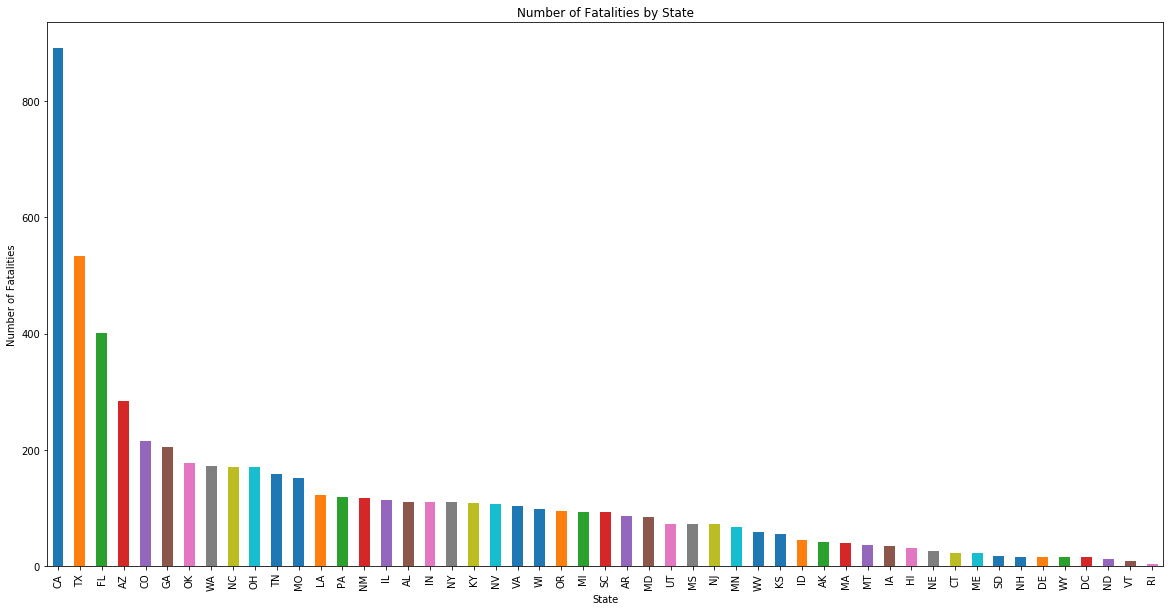

In [35]:
data.state.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Number of Fatalities by State')
plt.xlabel('State')
plt.ylabel('Number of Fatalities')
plt.show()

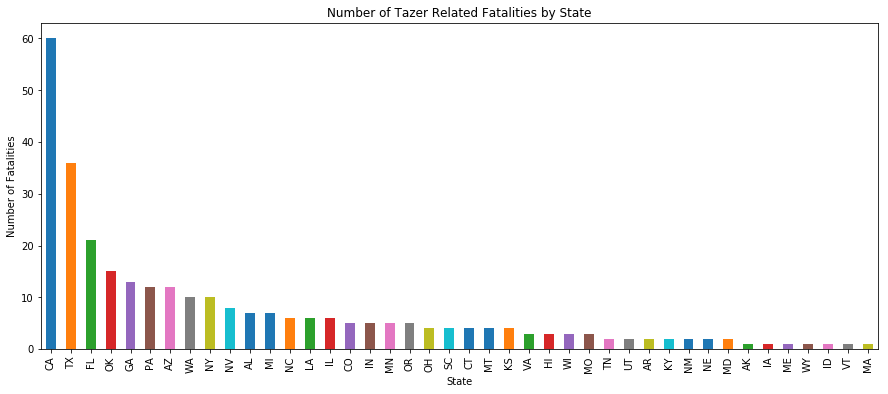

In [36]:
shot_tazed_data = data[data["manner_of_death"]!="shot"]
shot_tazed_data.state.value_counts().plot(kind='bar', figsize=(15,6))
plt.title('Number of Tazer Related Fatalities by State')
plt.xlabel('State')
plt.ylabel('Number of Fatalities')
plt.show()

In [13]:
shot_data = data[data["manner_of_death"]=="shot"]
heatmap_data = shot_data[['latitude', 'longitude']]
heatmap_data = heatmap_data.dropna()
heatmap_data.head()

,latitude,longitude
0,47.247,-123.122
1,45.487,-122.892
3,37.763,-122.422
4,40.384,-104.692
5,35.877,-97.423


In [14]:
heatmap_data2 = shot_tazed_data[['latitude', 'longitude']]
heatmap_data2 = heatmap_data2.dropna()
heatmap_data2.head()

,latitude,longitude
2,37.695,-97.281
10,37.930,-121.299
23,36.185,-115.116
38,37.588,-122.060
43,37.565,-82.921


In [15]:
# Creates a google maps oject with heat map overtop. Currently a bit buggy and runs slow. 
# Ongoing fix.

'''key = os.environ.get("gmapsapi")
gmaps.configure(api_key=key) 


heatmap_layer = gmaps.symbol_layer(heatmap_data, fill_color="red", stroke_color="red", scale=2)
heatmap_layer2 = gmaps.symbol_layer(heatmap_data2, fill_color="green", stroke_color="green", scale=2)
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig.add_layer(heatmap_layer2)
fig'''

'key = os.environ.get("gmapsapi")\ngmaps.configure(api_key=key) \n\n\nheatmap_layer = gmaps.symbol_layer(heatmap_data, fill_color="red", stroke_color="red", scale=2)\nheatmap_layer2 = gmaps.symbol_layer(heatmap_data2, fill_color="green", stroke_color="green", scale=2)\nfig = gmaps.figure()\nfig.add_layer(heatmap_layer)\nfig.add_layer(heatmap_layer2)\nfig'

Now let's look at how the data breaks down over time. We will look at total fatalities by month and by year

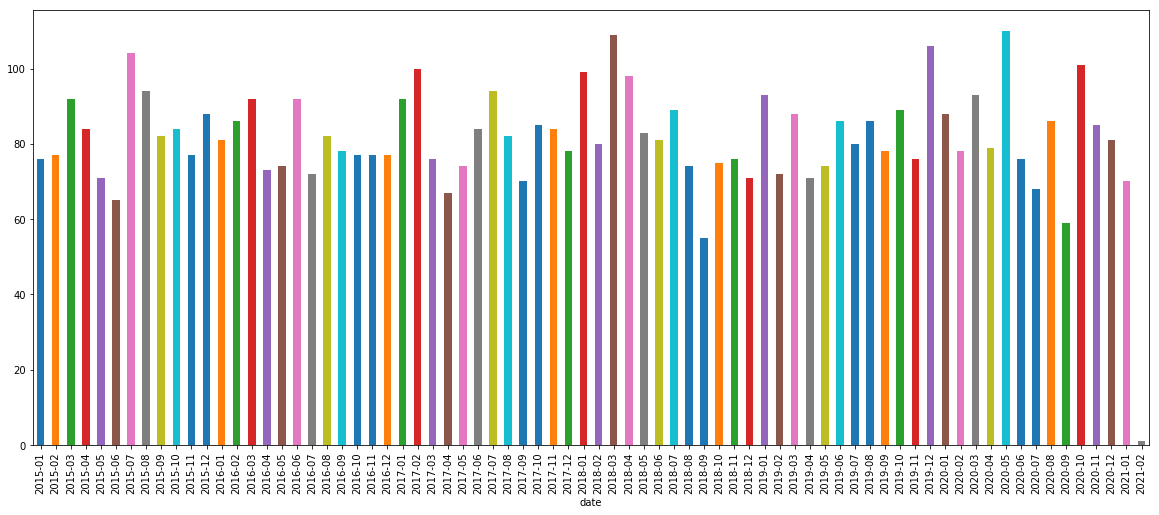

In [33]:
months = data.set_index(data.date)
months = months.resample('m', kind='period').count()['id']
months.plot(kind='bar', figsize=(20, 8))

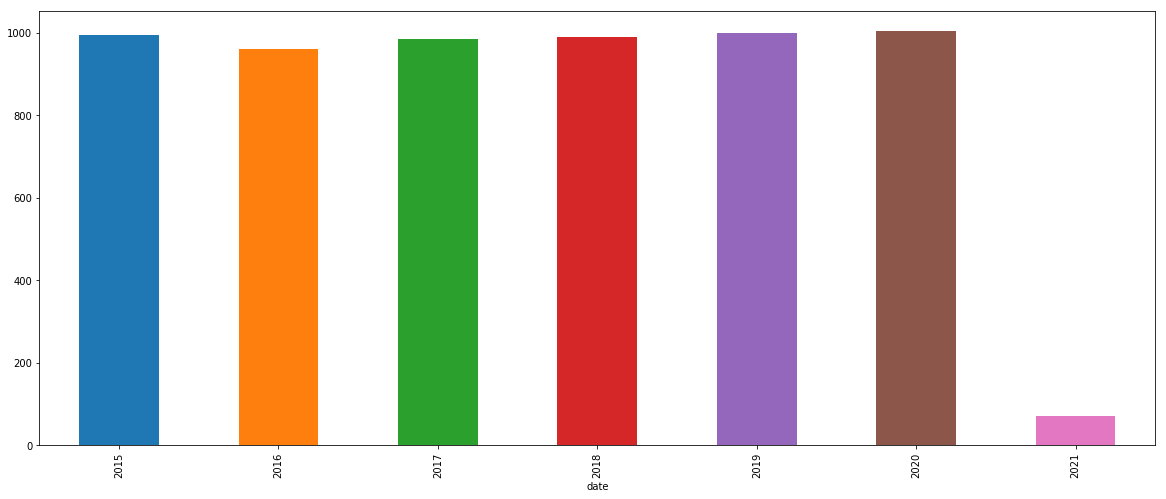

In [31]:
years = data.set_index(data.date)
years = years.resample('y', kind='period').count()['id']
years.plot(kind='bar', figsize=(20, 8))

That is surprisingly consistent

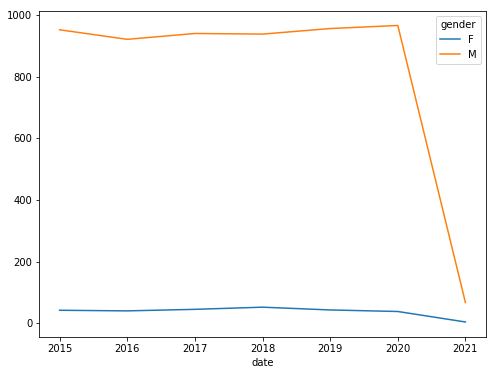

In [73]:
yearly_gender = data.groupby([data.date.dt.year, 'gender']).id.count()
yearly_gender.unstack().plot(figsize=(8,6))

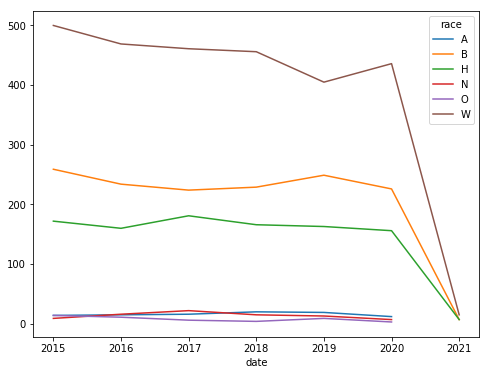

In [74]:
yearly_race = data.groupby([data.date.dt.year, 'race']).id.count()
yearly_race.unstack().plot(figsize=(8,6))

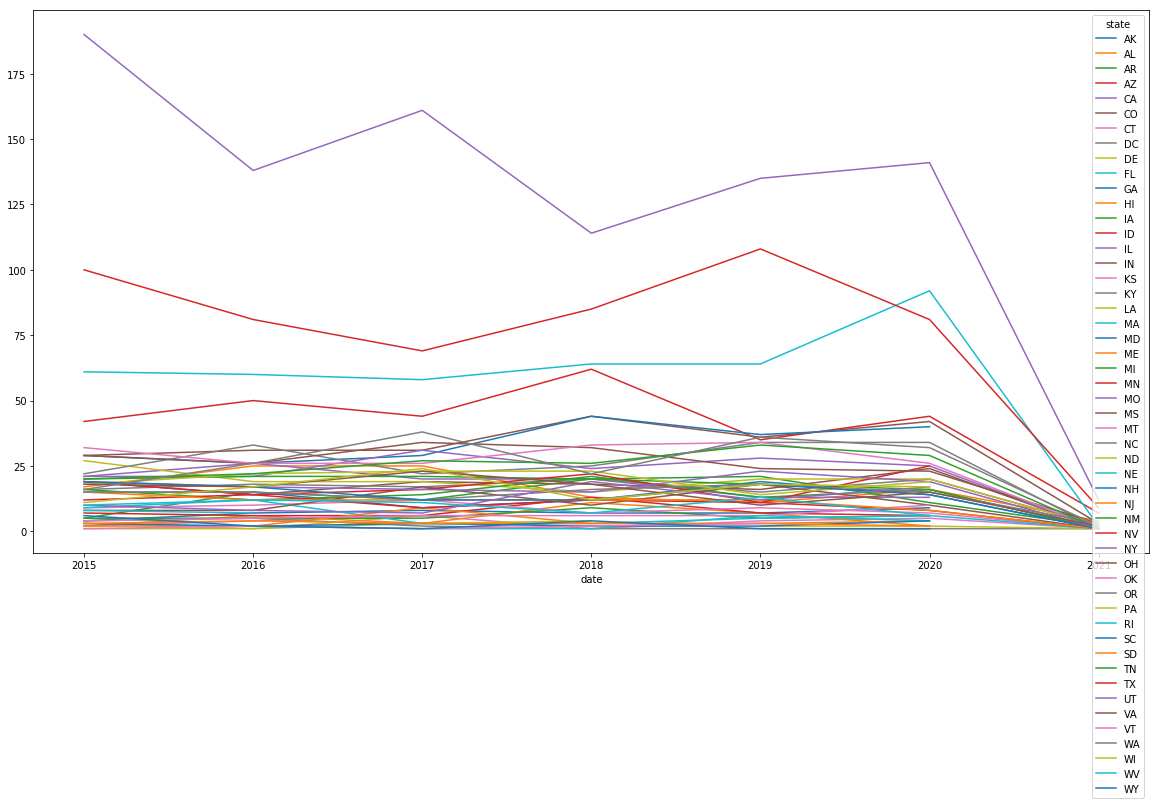

In [76]:
yearly_state = data.groupby([data.date.dt.year, 'state']).id.count()
yearly_state.unstack().plot(figsize=(20,10))